## Here will be analysis for the first Time Since Infection Paper

#### I will include both the mouse and the monkey analyses here.

MY NEXT STEP is to learn how to median normalize the mouse array. Consider going to my bioinformatics class html to get a method

### Mouse Analysis

#### Install required packages as needed
- Not all of these installed, but it should be fine for my purposes, I hope
- If note, this github has procedures for making sure R CRAN packages get installed into conda: https://github.com/conda/conda/issues/4355
https://stackoverflow.com/questions/34705917/conda-how-to-install-r-packages-that-are-not-available-in-r-essentials

In [6]:
# This is the correct way, that I learned in initially doing Monkey analysis in jupyter notebooks
# If I need to update packages, I may need to unlock these packages, as I can't reinstall caret with this code
conda.r = "/master/rault/miniconda3/lib/R/library"
install.packages("caret", conda.r)

#install.packages("deepnet", conda.r)
#devtools::install_github('topepo/caret/pkg/caret')
#install.packages("ranger", conda.r)
#install.packages("glmnet", conda.r)
#install.packages("gbm", conda.r)
#install.packages("e1071", conda.r)
#install.packages("mlbench", conda.r)

Warning message in install.packages("caret", conda.r):
“installation of package ‘caret’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [ ]:
#source("https://bioconductor.org/biocLite.R")
#biocLite()
#biocLite("Biobase")
# biocLite("GEOquery")
# biocLite("limma")
# biocLite("multtest")
# biocLite("HybridMTest")
# biocLite("MLInterfaces")
# install.packages("scatterplot3d")
# install.packages("rgl")
# install.packages("pheatmap")
# install.packages("dplyr")
# install.packages("gplots")
# install.packages("class")
# install.packages("e1071")
# install.packages("heatmap3")
# install.packages("heatmap.plus")
# install.packages("randomForest")
# install.packages("caret")

#### Load Required Libraries

Loading all the below works, except rgl and MLInterfaces, which I should not need

In [ ]:
library("randomForest")
library(gplots)
require("heatmap.plus")
require("heatmap3")
library(Biobase)
library(GEOquery)
library(limma)
library(scatterplot3d)
#library(rgl)
library(multtest)
library(pheatmap)
library(HybridMTest)
library(class)
#library(MLInterfaces)
library(e1071)
library(caret)
library(repr)
require(dplyr) # I don't think this is needed absolutely currently

In [9]:
# Make R graphs smaller
options(repr.plot.width=4, repr.plot.height=3)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin


Attaching package: ‘caret’

The following object is masked from ‘package:survival’:

    cluster

Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



#### Set up the environment and load in the data, applying p value of detection to whole dataset with all strains

In [32]:
source("utils.R")
path  = "/master/rault/TB"
data_path = paste(path, "/data/Mouse", sep="")

In [14]:
array_data = read.delim(paste(data_path, "P13_2011DS114_9MouseChips_BM_V4_0_R1_21Jan2011_Norm.txt", sep="/"))
QC_data = read.delim(paste(data_path,"P13_2011DS114_9MouseChips_BM_V4_0_R1_21Jan2011_QC.txt", sep="/"), header=T, skip = 8)
RNA_QC = read.delim(paste(data_path,"P13_TB_Mice_RNA QC.txt", sep="/"), header=T)
mousechip_conv = read.delim(paste(data_path,"Mousechip.txt", sep="/"), header=T)
pheno_data = read.delim(paste(data_path,"BV microarray for Baylor Annotation_Clinical.txt", sep="/"), header=T)

In [ ]:
colnames(pheno_data)[1] = "Sample.Group"
pheno_data$chip.name = paste("M#", pheno_data$Donor.ID, "OSU", sep="")

In [16]:
eset = make.expression.set(array_data, pheno_data, mousechip_conv)
eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 17275 features, 50 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: M#11OSU M#12OSU ... M#72OSU (50 total)
  varLabels: Strain Infect.Status Time.point.days
  varMetadata: M#11OSU M#12OSU ... labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

#### Select only C57BL/6 mice and make sure the arrays are median normalized 

Warning message in boxplot(log2(exprs(eset.B6)), ylim = c(0, 12)):
“NaNs produced”

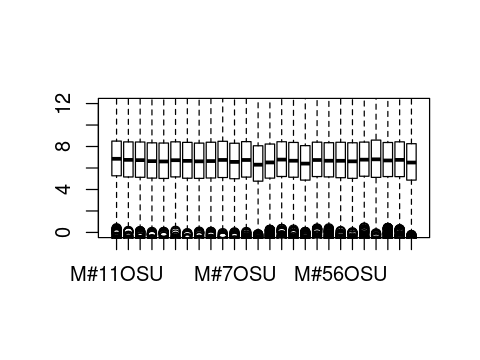

In [58]:
eset.B6 = eset[, eset$Strain=="C57BL/6"]
boxplot(log2(exprs(eset.B6)), ylim=c(0,12))

#### Now find genes that are 2-fold changed from median in 10% of samples (basic filtering) and log2 transform the data

In [46]:
hist(expres)

In [47]:
eset.B6.log = eset.B6
exprs(eset.B6.log) = log2(exprs(eset.B6.log))

Warning message in eval(expr, envir, enclos):
“NaNs produced”

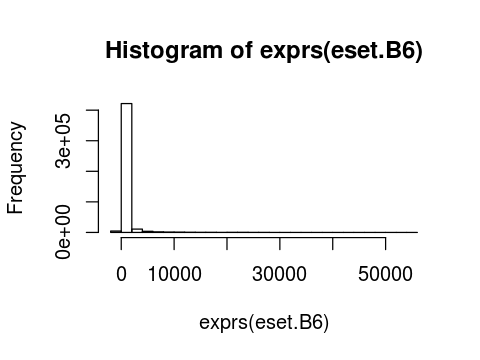

In [51]:
hist(exprs(eset.B6))

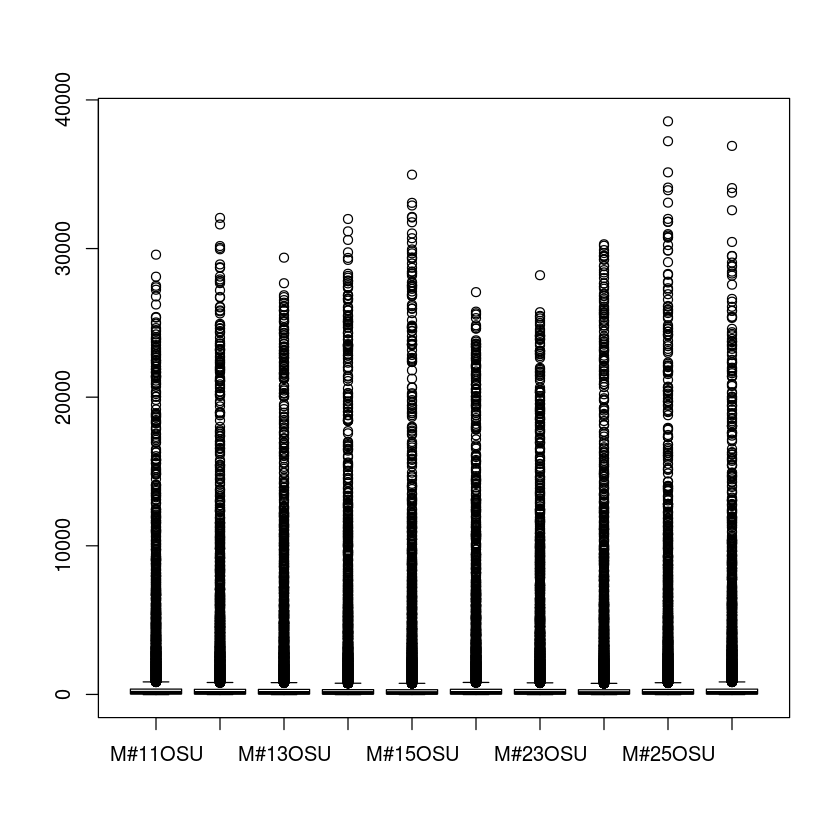

In [43]:
boxplot(exprs(eset.B6[,1:10]))

In [40]:
eset.B6.2xUDALO = normalization(eset.B6)

[1] "1910 genes passed the 2 fold change from median in 10% of samples filter"


#### Make sure the arrays are median normalized, within the 